In [ ]:
import pandas as pd


file_path = r"D:\AIDS\3rd year\sem2\Bee Hive Condition Projecct\archive\Beehive-Health-Detection-System\bee_data_split_audio.xlsx"



# Load the CSV file
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

# Display basic info about the dataset (data types, non-null counts)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

# Check for missing values (count of NaN per column)
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n" + "="*50 + "\n")

# Percentage of missing values per column
print("Percentage of Missing Values per Column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2))  # Rounded to 2 decimal places
print("\n" + "="*50 + "\n")

# Check column data types and unique value counts (to spot potential errors)
print("Column Data Types and Unique Values:")
for column in df.columns:
    print(f"Column: {column}")
    print(f"  Data Type: {df[column].dtype}")
    print(f"  Unique Values: {df[column].nunique()}")
    # Display sample values (first 5 unique values) to inspect for errors
    print(f"  Sample Values: {df[column].dropna().unique()[:5]}")
    print("-"*30)

First 5 rows of the dataset:
   device  hive number            date  hive temp  hive humidity  \
0       1            5  6/10/2022 0:44      22.79          49.53   
1       1            5  6/10/2022 0:44      22.79          49.53   
2       1            5  6/10/2022 0:44      22.79          49.53   
3       1            5  6/10/2022 0:44      22.79          49.53   
4       1            5  6/10/2022 0:44      22.79          49.53   

   weather temp  weather humidity                                   file name  \
0         18.21                67  2022-06-10--00-44-04_1__segment0_part1.wav   
1         18.21                67  2022-06-10--00-44-04_1__segment0_part2.wav   
2         18.21                67  2022-06-10--00-44-04_1__segment0_part3.wav   
3         18.21                67  2022-06-10--00-44-04_1__segment0_part4.wav   
4         18.21                67  2022-06-10--00-44-04_1__segment0_part5.wav   

   queen presence  queen acceptance  target  
0               1            


🔍 Analyzing relationships with target: queen presence

📊 Correlation with numeric features:
queen presence      1.000000
queen acceptance    0.826579
hive humidity       0.024258
weather humidity    0.023994
hive temp          -0.052191
weather temp       -0.058111
Name: queen presence, dtype: float64


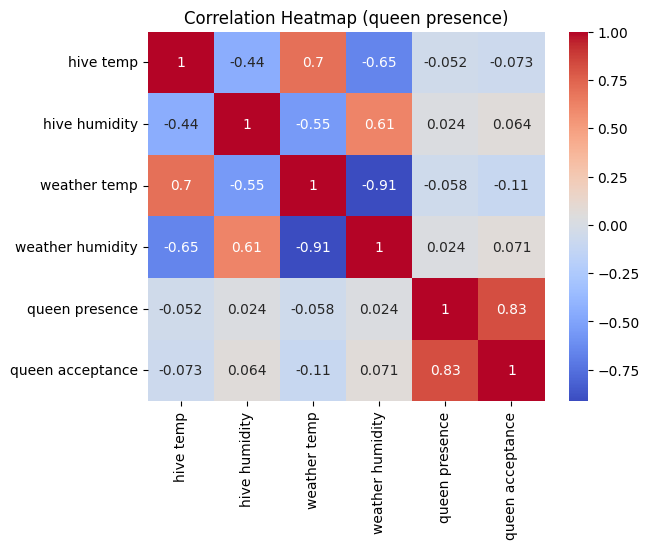


📈 Chi-squared Test Results:
hive temp: chi2 = 14.34, p = 0.0002
hive humidity: chi2 = 2.61, p = 0.1064
weather temp: chi2 = 19.34, p = 0.0000
weather humidity: chi2 = 2.36, p = 0.1246
queen acceptance: chi2 = 4959.81, p = 0.0000

🌲 Feature Importances (Random Forest):
queen acceptance    0.901847
weather humidity    0.044579
weather temp        0.019263
hive humidity       0.018016
hive temp           0.016295
dtype: float64


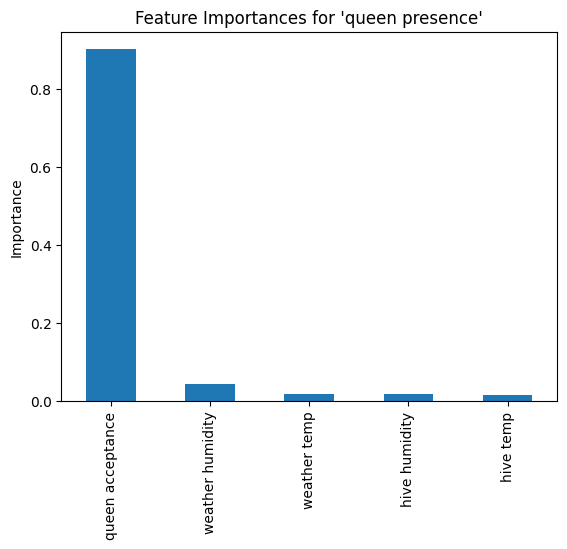


🔍 Analyzing relationships with target: queen acceptance

📊 Correlation matrix not shown for multi-class target.

📈 Chi-squared Test Results:
hive temp: chi2 = 29.14, p = 0.0000
hive humidity: chi2 = 29.69, p = 0.0000
weather temp: chi2 = 79.15, p = 0.0000
weather humidity: chi2 = 36.75, p = 0.0000
queen presence: chi2 = 5676.00, p = 0.0000

🌲 Feature Importances (Random Forest):
queen presence      0.748996
hive humidity       0.085112
weather humidity    0.060838
weather temp        0.058755
hive temp           0.046298
dtype: float64


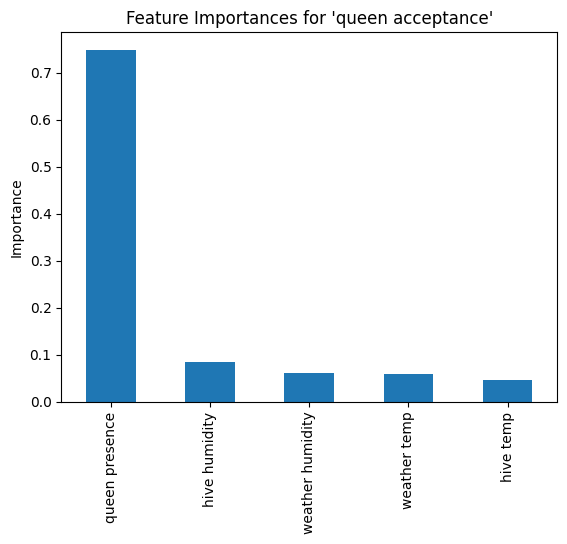

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# Drop columns not useful for modeling
df_clean = df.drop(columns=['file name', 'date', 'target', 'device',  'hive number'])

# Normalize numeric columns for chi2
scaler = MinMaxScaler()
df_scaled = df_clean.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_clean[df_clean.columns])

# Function to analyze a target variable
def analyze_target_relationships(target_col):
    print(f"\n🔍 Analyzing relationships with target: {target_col}\n")

    # 1. Correlation (for numeric features)
    if df_clean[target_col].nunique() > 2:
        # For multi-class target, skip correlation
        print("📊 Correlation matrix not shown for multi-class target.")
    else:
        print("📊 Correlation with numeric features:")
        corr = df_clean.corr()[target_col].sort_values(ascending=False)
        print(corr)
        sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
        plt.title(f"Correlation Heatmap ({target_col})")
        plt.show()

    # 2. Chi-squared test (categorical vs categorical)
    print("\n📈 Chi-squared Test Results:")
    X_cat = df_scaled.drop(columns=[target_col])
    y_cat = df_clean[target_col]
    chi_vals, p_vals = chi2(X_cat, y_cat)
    for feature, score, p in zip(X_cat.columns, chi_vals, p_vals):
        print(f"{feature}: chi2 = {score:.2f}, p = {p:.4f}")

    # 3. Feature importance via Random Forest
    print("\n🌲 Feature Importances (Random Forest):")
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model = RandomForestClassifier(n_estimators=50, max_depth=5)
    model.fit(X_train, y_train)
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)
    print(importances)

    # Plot feature importance
    importances.plot(kind="bar", title=f"Feature Importances for '{target_col}'")
    plt.ylabel("Importance")
    plt.show()


# Analyze each of your targets
analyze_target_relationships("queen presence")
analyze_target_relationships("queen acceptance")



🔍 Class distribution for: queen presence
queen presence
1    36924
0     5676
Name: count, dtype: int64


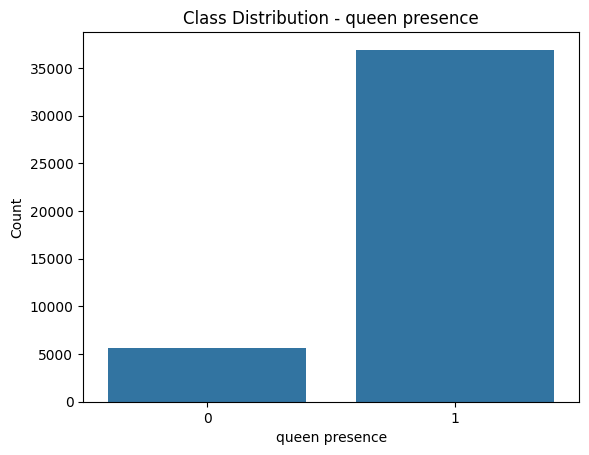


🔍 Class distribution for: queen acceptance
queen acceptance
2    27606
1     9318
0     5676
Name: count, dtype: int64


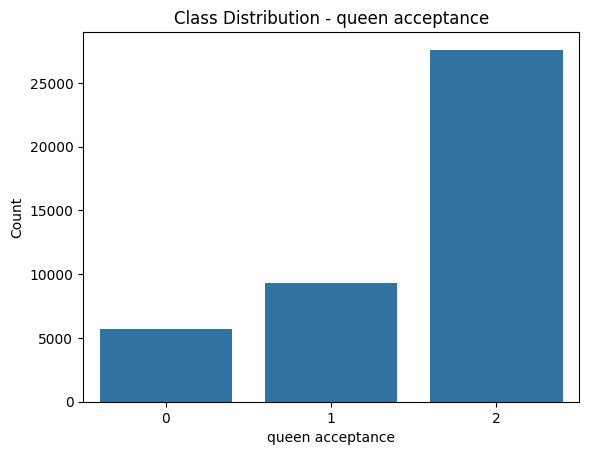

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of your target columns
target_columns = ["queen presence", "queen acceptance"]

for col in target_columns:
    print(f"\n🔍 Class distribution for: {col}")
    print(df[col].value_counts())

    # Plot the class distribution
    sns.countplot(data=df, x=col)
    plt.title(f"Class Distribution - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [44]:
import os
import librosa
import numpy as np
import pandas as pd

# Load dataset
df.columns = df.columns.str.strip()

# Path to the directory containing audio files
audio_dir = r"D:\AIDS\3rd year\sem2\Bee Hive Condition Projecct\archive\sound_files\split_audio"

# Function to extract audio features (e.g., MFCCs)
def extract_audio_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Loop over each file and extract features
audio_features = []
failed_files = []

for fname in df['file name']:
    segment_features = []
    
    try:
        segment_path = os.path.join(audio_dir, fname)
        if os.path.exists(segment_path):
            features = extract_audio_features(segment_path)
            segment_features.append(features)
        else:
            print(f"Segment missing: {segment_path}")

        if segment_features:
            # Average features across segments
            avg_features = np.mean(segment_features, axis=0)
            audio_features.append(avg_features)
        else:
            # If no segment was found or all failed
            audio_features.append([np.nan] * 13)
            failed_files.append(fname)

    except Exception as e:
        print(f"❌ Error processing {fname}: {e}")
        audio_features.append([np.nan] * 13)
        failed_files.append(fname)


# Add audio features to dataframe
mfcc_df = pd.DataFrame(audio_features, columns=[f"mfcc_{i+1}" for i in range(13)])
df_combined = pd.concat([df, mfcc_df], axis=1).dropna()


In [45]:
print(df_combined)

       device  hive number            date  hive temp  hive humidity  \
0           1            5  6/10/2022 0:44      22.79          49.53   
1           1            5  6/10/2022 0:44      22.79          49.53   
2           1            5  6/10/2022 0:44      22.79          49.53   
3           1            5  6/10/2022 0:44      22.79          49.53   
4           1            5  6/10/2022 0:44      22.79          49.53   
...       ...          ...             ...        ...            ...   
42595       2            1   7/9/2022 9:56      44.91          24.96   
42596       2            1   7/9/2022 9:56      44.91          24.96   
42597       2            1   7/9/2022 9:56      44.91          24.96   
42598       2            1   7/9/2022 9:56      44.91          24.96   
42599       2            1   7/9/2022 9:56      44.91          24.96   

       weather temp  weather humidity  \
0             18.21                67   
1             18.21                67   
2           

In [46]:
df_combined.to_excel("bee_data_with_features.xlsx", index=False)


In [6]:
import pandas as pd

df_combined = pd.read_excel("bee_data_with_features.xlsx")

# Separate the two classes
df_queen_0 = df_combined[df_combined["queen presence"] == 0]
df_queen_1 = df_combined[df_combined["queen presence"] == 1]

# Find the smaller class size
min_size = min(len(df_queen_0), len(df_queen_1))

# Undersample both to the size of the smaller class
df_queen_0_sampled = df_queen_0.sample(n=min_size, random_state=42)
df_queen_1_sampled = df_queen_1.sample(n=min_size, random_state=42)

# Combine the balanced classes
df_combined = pd.concat([df_queen_0_sampled, df_queen_1_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_combined["queen presence"].value_counts())



queen presence
0    5676
1    5676
Name: count, dtype: int64


In [7]:
(df_combined)

,device,hive number,date,hive temp,hive humidity,weather temp,weather humidity,file name,queen presence,queen acceptance,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1,5,6/9/2022 6:11,22.72,45.41,11.95,87,2022-06-09--06-11-16_1__segment3_part1.wav,0,0,...,70.346077,-23.909750,39.460567,-14.846230,24.363802,-10.669391,2.380473,-2.999743,-8.981545,5.825330
1,2,1,6/25/2022 8:44,28.12,41.77,20.92,51,2022-06-25--08-44-24_2__segment4_part3.wav,1,2,...,48.257812,-22.995213,26.140816,-13.482043,14.396722,-6.515510,-3.463898,-0.598192,-11.207892,6.316262
2,1,4,7/5/2022 20:26,25.96,51.94,19.82,71,2022-07-05--20-26-51_1__segment5_part2.wav,1,2,...,69.254387,-35.048576,34.077091,-16.763157,17.833704,-10.360900,-0.821419,0.554756,-13.557332,5.239719
3,2,1,6/25/2022 23:56,19.75,39.09,16.33,77,2022-06-25--23-56-42_2__segment2_part4.wav,0,0,...,50.760609,-23.773731,29.972624,-16.446388,17.542597,-4.222394,-0.915896,0.383896,-12.501169,5.639013
4,1,4,7/9/2022 9:34,30.21,65.67,20.35,70,2022-07-09--09-34-03_1__segment3_part3.wav,1,2,...,62.952347,-26.685909,31.748398,-11.934899,14.262769,-10.222401,-3.268977,0.461759,-13.750092,4.174207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,1,4,7/7/2022 16:58,30.55,48.54,25.05,49,2022-07-07--16-58-09_1__segment4_part5.wav,1,2,...,63.769749,-30.049458,30.845779,-14.401130,15.410422,-7.736891,-0.614362,1.028893,-12.911826,5.829859
11348,2,1,6/26/2022 9:49,45.21,23.14,22.17,56,2022-06-26--09-49-13_2__segment5_part3.wav,0,0,...,51.651955,-27.632551,29.727179,-14.936886,17.797634,-6.152236,-4.116256,-1.876298,-12.249848,5.059294
11349,1,4,6/26/2022 19:41,31.92,63.57,22.53,57,2022-06-26--19-41-10_1__segment2_part4.wav,0,0,...,57.446850,-17.235533,28.980936,-8.603214,13.057416,-5.374122,-3.218393,3.108387,-12.119702,5.601437
11350,2,1,6/27/2022 1:35,18.54,39.48,14.54,84,2022-06-27--01-35-57_2__segment1_part1.wav,0,0,...,50.888042,-24.582403,29.245777,-15.573632,18.071486,-5.811742,-2.988760,0.292448,-11.415478,6.737396


In [8]:
X = df_combined.drop(columns=["file name", "date", "device", "hive number", "queen presence", "queen acceptance", "target"])
y = df_combined["queen presence"]  

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Drop non-numeric/unnecessary for model inputs
X = df_combined.drop(columns=["file name", "date", "device", "hive number", "queen presence", "queen acceptance", "target"])
y = df_combined["queen presence"]  # or "queen acceptance", etc.

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a simple model (can be replaced with LightGBM or others)
clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(X_train, y_train)

# Evaluate
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1136
           1       0.77      0.86      0.81      1135

    accuracy                           0.80      2271
   macro avg       0.81      0.80      0.80      2271
weighted avg       0.81      0.80      0.80      2271



In [11]:
import joblib

joblib.dump(clf1, 'queen_presence_model.pkl')


['queen_presence_model.pkl']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Drop non-numeric/unnecessary for model inputs
X = df_combined.drop(columns=["file name", "date", "device", "hive number", "queen presence", "queen acceptance", "target"])
y = df_combined["queen acceptance"]  # or "queen acceptance", etc.

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a simple model (can be replaced with LightGBM or others)
clf2 = DecisionTreeClassifier(max_depth=5)
clf2.fit(X_train, y_train)

# Evaluate
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.25      0.36      1105
           1       0.71      0.48      0.57      1923
           2       0.77      0.95      0.85      5492

    accuracy                           0.75      8520
   macro avg       0.70      0.56      0.59      8520
weighted avg       0.73      0.75      0.72      8520



In [52]:
print(X)

       hive temp  hive humidity  weather temp  weather humidity      mfcc_1  \
0          22.79          49.53         18.21                67 -253.075516   
1          22.79          49.53         18.21                67 -277.391571   
2          22.79          49.53         18.21                67 -282.640442   
3          22.79          49.53         18.21                67 -280.645081   
4          22.79          49.53         18.21                67 -278.689636   
...          ...            ...           ...               ...         ...   
42595      44.91          24.96         21.32                66 -237.369110   
42596      44.91          24.96         21.32                66 -237.285858   
42597      44.91          24.96         21.32                66 -237.225311   
42598      44.91          24.96         21.32                66 -237.553329   
42599      44.91          24.96         21.32                66 -237.936234   

           mfcc_2     mfcc_3     mfcc_4     mfcc_5 


📌 Evaluating Model for: Queen Acceptance

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.25      0.36      1105
           1       0.71      0.48      0.57      1923
           2       0.77      0.95      0.85      5492

    accuracy                           0.75      8520
   macro avg       0.70      0.56      0.59      8520
weighted avg       0.73      0.75      0.72      8520



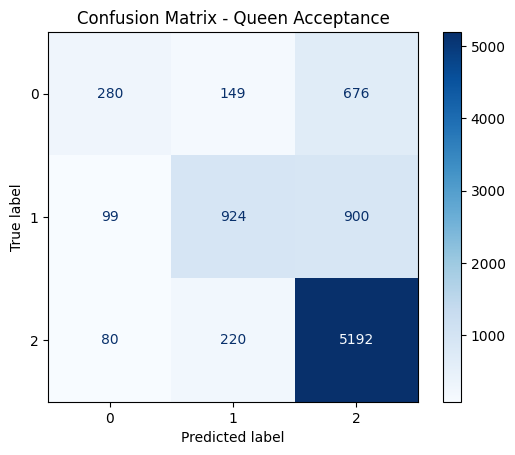


📌 Evaluating Model for: Queen Presence

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.27      0.42      1105
           1       0.90      0.99      0.95      7415

    accuracy                           0.90      8520
   macro avg       0.89      0.63      0.68      8520
weighted avg       0.90      0.90      0.88      8520



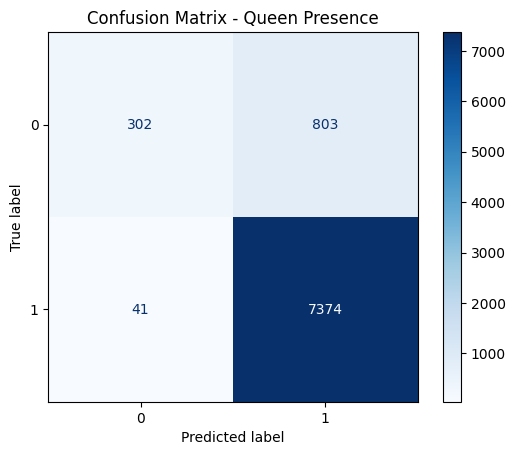

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Shared input features
X = df_combined.drop(columns=["file name", "date", "device", "hive number", "queen presence", "queen acceptance", "target"])

# Define targets
targets = {
    "Queen Acceptance": df_combined["queen acceptance"],
    "Queen Presence": df_combined["queen presence"]
}

for model_name, y in targets.items():
    print(f"\n📌 Evaluating Model for: {model_name}")

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # Evaluation Report
    print("\n🔍 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


In [ ]:
import joblib


joblib.dump(clf1, 'queen_presence_model.pkl')
joblib.dump(clf2, 'queen_acceptance_model.pkl')


['bee_sound_anomaly_model.pkl']